In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import arrow
from scipy.signal import savgol_filter 
import numpy as np
from lmfit.models import SkewedGaussianModel

In [2]:
# data from: http://ncov.mohw.go.kr/
df = pd.read_csv("all.csv").loc[1:].reset_index()
df["counts"] = [float(c.replace(",", "")) for c in df["계(명)"]]
df["savgol"] = savgol_filter([float(c.replace(",", "")) for c in df["계(명)"]], 7, 2)
df["ts"] = pd.to_datetime([str(arrow.get(t)) for t in df["일자"]])
df["rolling_avg"] = df["counts"].rolling(7).mean()

In [3]:
def skewed_gaussian_fitting_n_plot(target_y, start_idx, df, show_stats=False):
    window_length = len(df) - start_idx
    april = pd.to_datetime([f"2022-04-{x}T00:00:00+00:00'" for x in range(1,31)]).to_list()
    may = pd.to_datetime([f"2022-05-{x}T00:00:00+00:00'" for x in range(1,32)]).to_list()
    whole_date = df["ts"].to_list() + april + may

    whole_date = sorted(list(set(whole_date)))
    xvals = np.arange(0, window_length)
    yvals = target_y[start_idx:]


    model = SkewedGaussianModel()

    # set initial parameter values
    params = model.make_params(amplitude=13639305., center=102.12, sigma=22.41, gamma=0)

    # adjust parameters  to best fit data.
    result = model.fit(yvals, params, x=xvals)
    
    if show_stats:
        print(result.fit_report())

    plt.figure(figsize=(6.5, 5))
    plt.title("fitting")
    plt.plot(xvals, yvals, 'd')
    ex = result.eval(x=xvals)
    plt.plot(xvals, ex)


    plt.figure(figsize=(10, 5))

    expected = result.eval(x=np.arange(-20, window_length+35))

    plt.plot(whole_date[start_idx-20:start_idx+window_length],  target_y[start_idx-20:], 'd', label="daily Covid cases")
    plt.plot(whole_date[start_idx-20:start_idx+window_length+35], expected, label="fitting")
    plt.legend()
    plt.title("Forcasting Korean Covid cases")
    plt.xticks(whole_date[start_idx-20:start_idx+window_length+35][::15])

## 7-day rolling avg & original confirmed cases

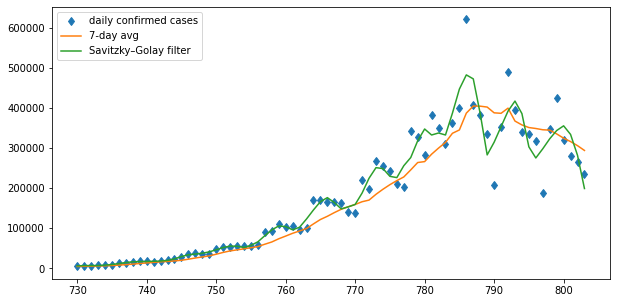

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df.counts[730:], 'd', label="daily confirmed cases")
df.rolling_avg[730:].plot(label="7-day avg")
df.savgol[730:].plot(label="Savitzky–Golay filter")
plt.legend()

## skewed normal fifting using original data

[[Model]]
    Model(skewed_gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 146
    # data points      = 39
    # variables        = 4
    chi-square         = 1.7471e+11
    reduced chi-square = 4.9917e+09
    Akaike info crit   = 874.690658
    Bayesian info crit = 881.344905
[[Variables]]
    amplitude:  14833993.3 +/- 1268451.29 (8.55%) (init = 1.363930e+07)
    center:     33.8774834 +/- 11.8308668 (34.92%) (init = 102.12)
    sigma:      19.1082692 +/- 9.73607888 (50.95%) (init = 22.41)
    gamma:     -1.08396536 +/- 2.24851092 (207.43%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = 0.994
    C(center, gamma)     = -0.989
    C(sigma, gamma)      = -0.981
    C(amplitude, gamma)  = 0.416
    C(amplitude, center) = -0.310
    C(amplitude, sigma)  = -0.253


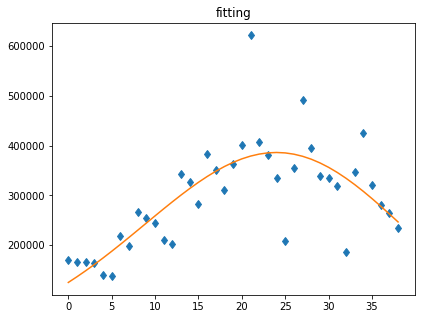

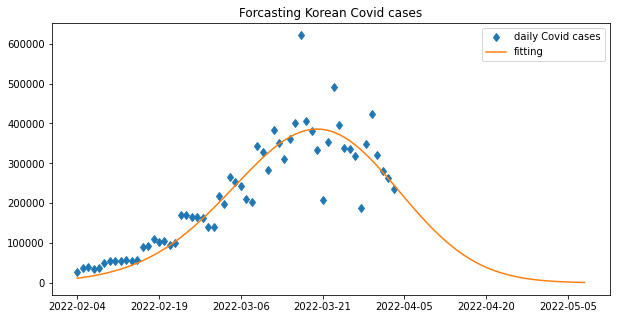

In [5]:
target_y = df.counts
start_idx = 765

skewed_gaussian_fitting_n_plot(target_y, start_idx, df, show_stats=True)

## skewed normal fifting using 7-day rolling avg

[[Model]]
    Model(skewed_gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 210
    # data points      = 39
    # variables        = 4
    chi-square         = 1.0042e+10
    reduced chi-square = 2.8691e+08
    Akaike info crit   = 763.292023
    Bayesian info crit = 769.946270
[[Variables]]
    amplitude:  14368521.6 +/- 390535.783 (2.72%) (init = 1.363930e+07)
    center:     38.4711972 +/- 0.79538140 (2.07%) (init = 102.12)
    sigma:      21.3057895 +/- 1.17155214 (5.50%) (init = 22.41)
    gamma:     -1.75076548 +/- 0.44448440 (25.39%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = 0.937
    C(sigma, gamma)      = -0.888
    C(center, gamma)     = -0.767
    C(amplitude, gamma)  = 0.661
    C(amplitude, sigma)  = -0.282
    C(amplitude, center) = -0.110


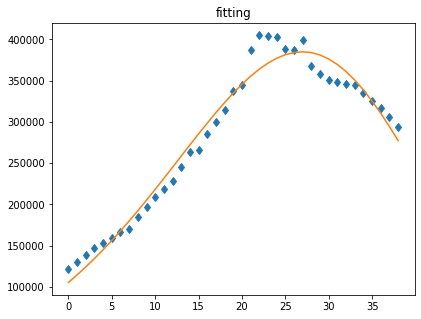

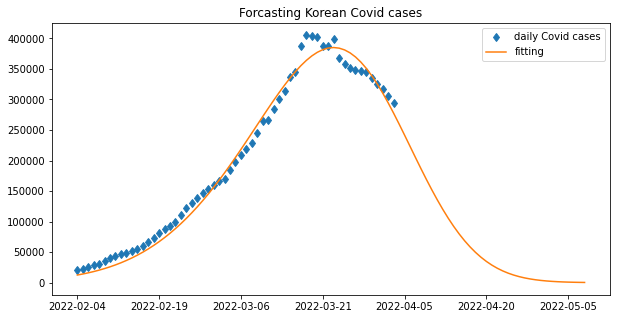

In [6]:
target_y = df.rolling_avg
start_idx = 765

skewed_gaussian_fitting_n_plot(target_y, start_idx, df, show_stats=True)

[[Model]]
    Model(skewed_gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 145
    # data points      = 39
    # variables        = 4
    chi-square         = 7.5255e+10
    reduced chi-square = 2.1501e+09
    Akaike info crit   = 841.842743
    Bayesian info crit = 848.496989
[[Variables]]
    amplitude:  14961079.0 +/- 860867.795 (5.75%) (init = 1.363930e+07)
    center:     34.0993634 +/- 7.96406219 (23.36%) (init = 102.12)
    sigma:      19.2861983 +/- 6.54452437 (33.93%) (init = 22.41)
    gamma:     -1.08794210 +/- 1.50453216 (138.29%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = 0.994
    C(center, gamma)     = -0.989
    C(sigma, gamma)      = -0.981
    C(amplitude, gamma)  = 0.437
    C(amplitude, center) = -0.330
    C(amplitude, sigma)  = -0.275


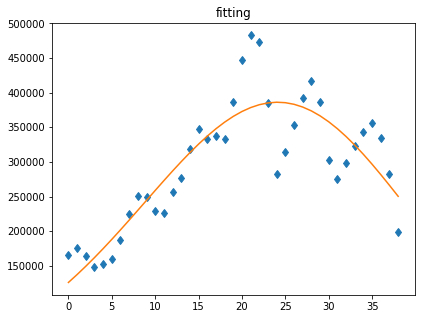

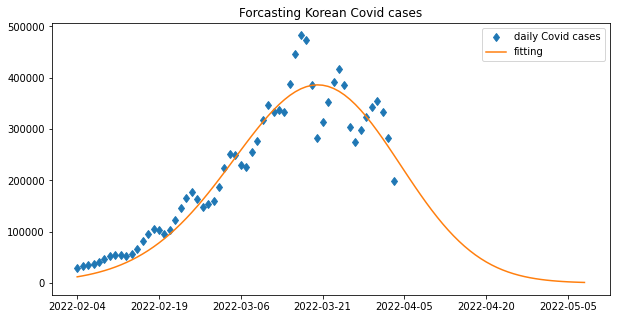

In [7]:
target_y = df.savgol
start_idx = 765

skewed_gaussian_fitting_n_plot(target_y, start_idx, df, show_stats=True)